In [12]:
from asammdf import Signal
import numpy as np

In [13]:
import IPython.display as display
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# Create 3 Signal objects with different time stamps

In [14]:
# unit8 with 100ms time raster
timestamps = np.array([0.1 * t for t in range(5)], dtype=np.float32)
s_uint8 = Signal(
    samples=np.array([t for t in range(5)], dtype=np.uint8),
    timestamps=timestamps,
    name="Uint8_Signal",
    unit="u1",
)

# int32 with 50ms time raster
timestamps = np.array([0.05 * t for t in range(10)], dtype=np.float32)
s_int32 = Signal(
    samples=np.array(list(range(-500, 500, 100)), dtype=np.int32),
    timestamps=timestamps,
    name="Int32_Signal",
    unit="i4",
)

# float64 with 300ms time raster
timestamps = np.array([0.3 * t for t in range(3)], dtype=np.float32)
s_float64 = Signal(
    samples=np.array(list(range(2000, -1000, -1000)), dtype=np.int32),
    timestamps=timestamps,
    name="Float64_Signal",
    unit="f8",
)

# Map signals

In [15]:
xs = np.linspace(-1, 1, 50)
ys = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(xs, ys)

In [16]:
vals = np.linspace(0, 180.0 / np.pi, 100)
phi = np.ones((len(vals), 50, 50), dtype=np.float64)

In [17]:
for i, val in enumerate(vals):
    phi[i] *= val
R = 1 - np.sqrt(X ** 2 + Y ** 2)
samples = np.cos(2 * np.pi * X + phi) * R

timestamps = np.arange(0, 2, 0.02)

s_map = Signal(
    samples=samples, timestamps=timestamps, name="Variable Map Signal", unit="dB"
)

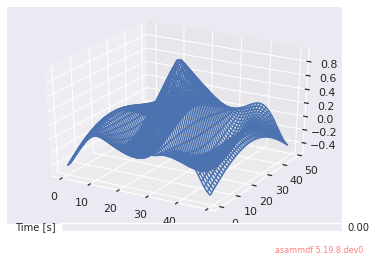

In [18]:
s_map.plot()

Set plot settings for a larger plot.

/projects/Jupyter_MDF_Analysis/asammdf/asammdf/signal.py:262: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111, projection="3d")


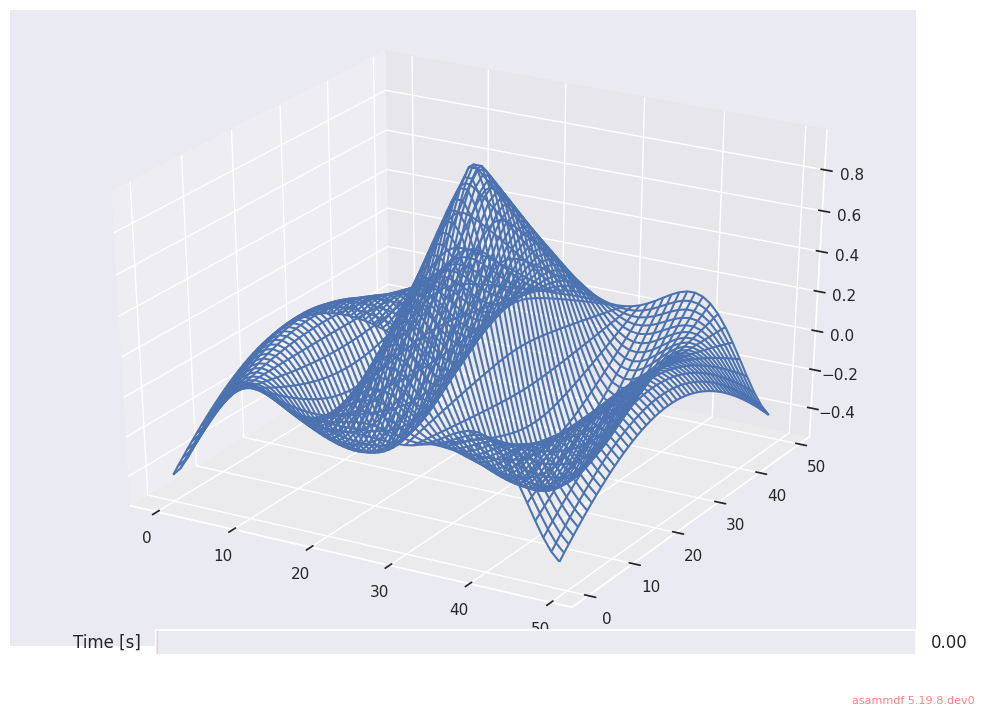

In [19]:
mpl.rc_file_defaults()
sns.set(
    rc={
        "figure.figsize": (11.69, 8.27), # A4 paper size.
        "figure.facecolor": "w",
        "figure.edgecolor": "k",
        "axes.labelsize": 18,
        "axes.titlesize": 18,
    }
)
s_map.plot()

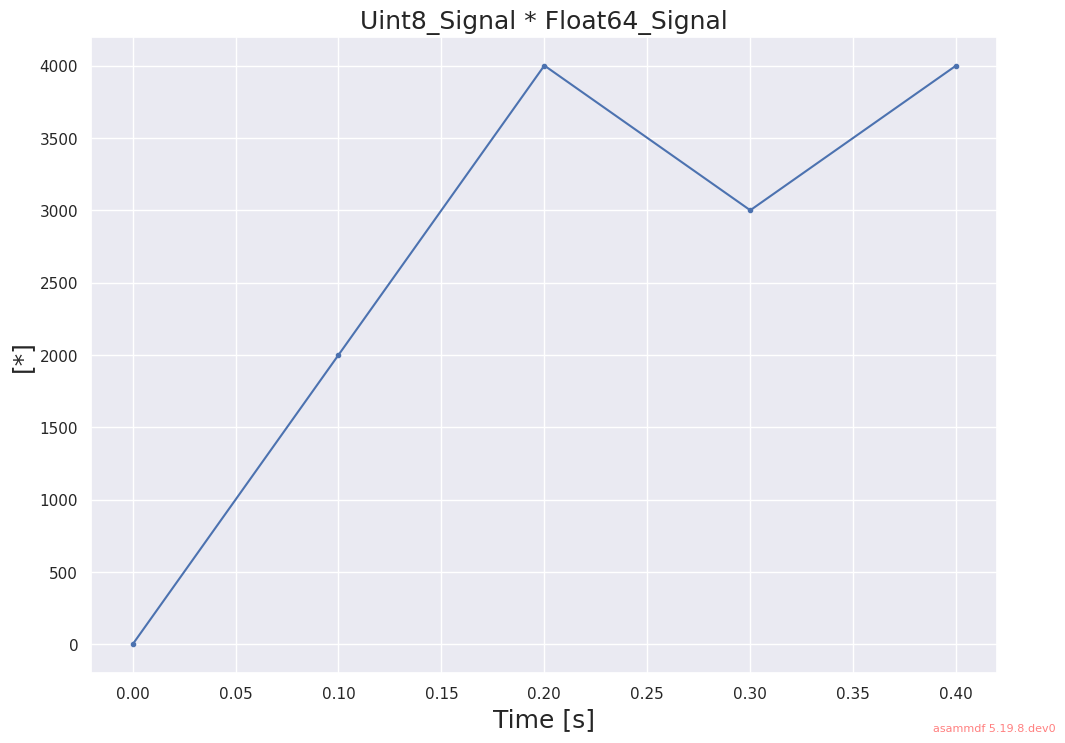

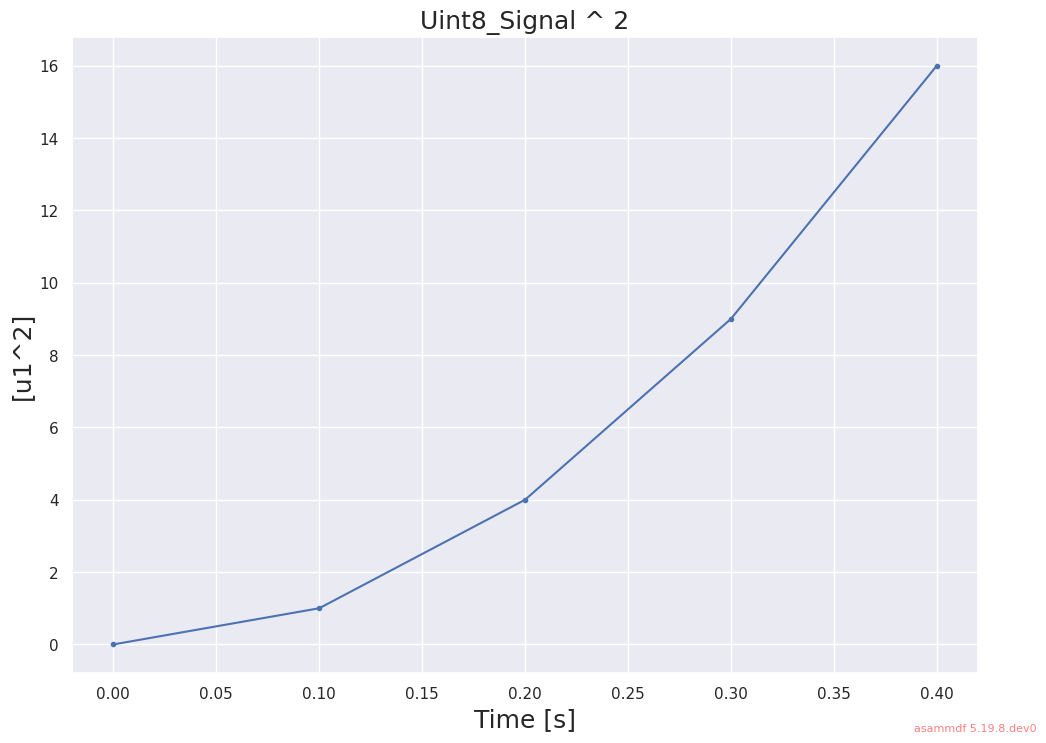

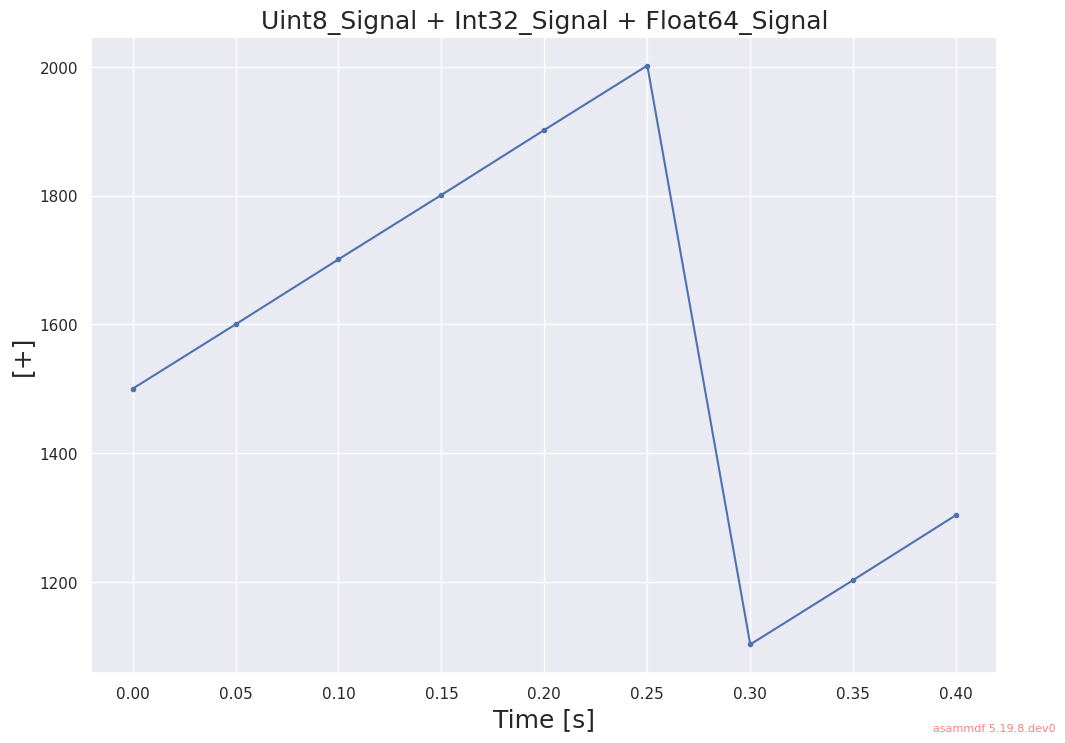

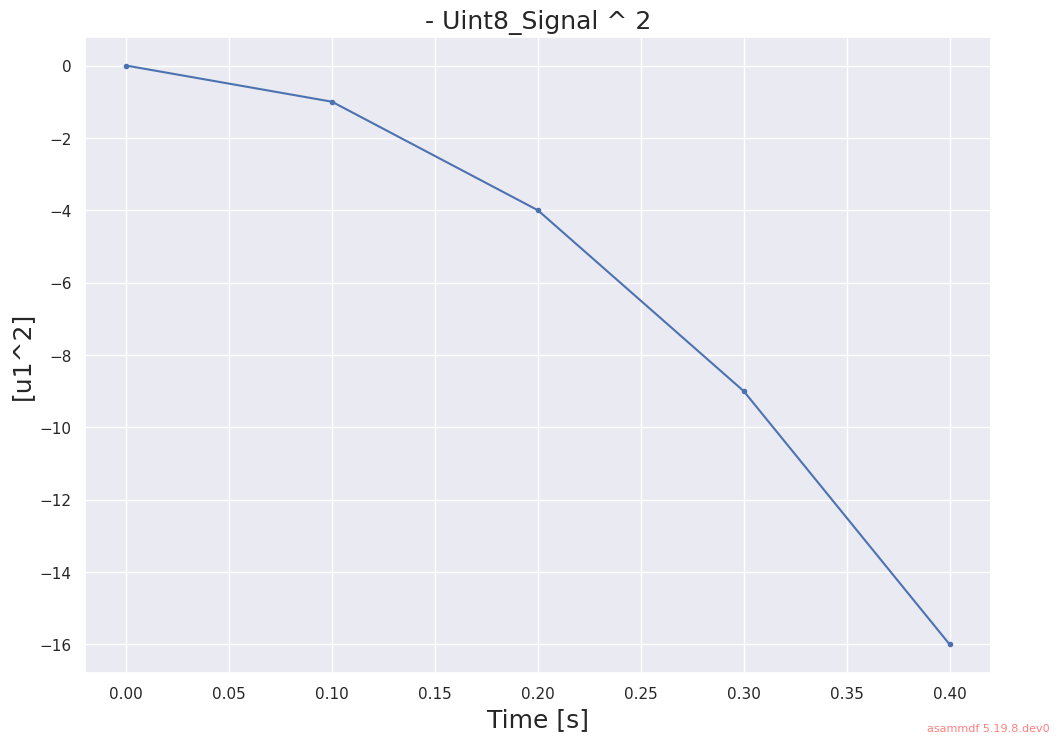

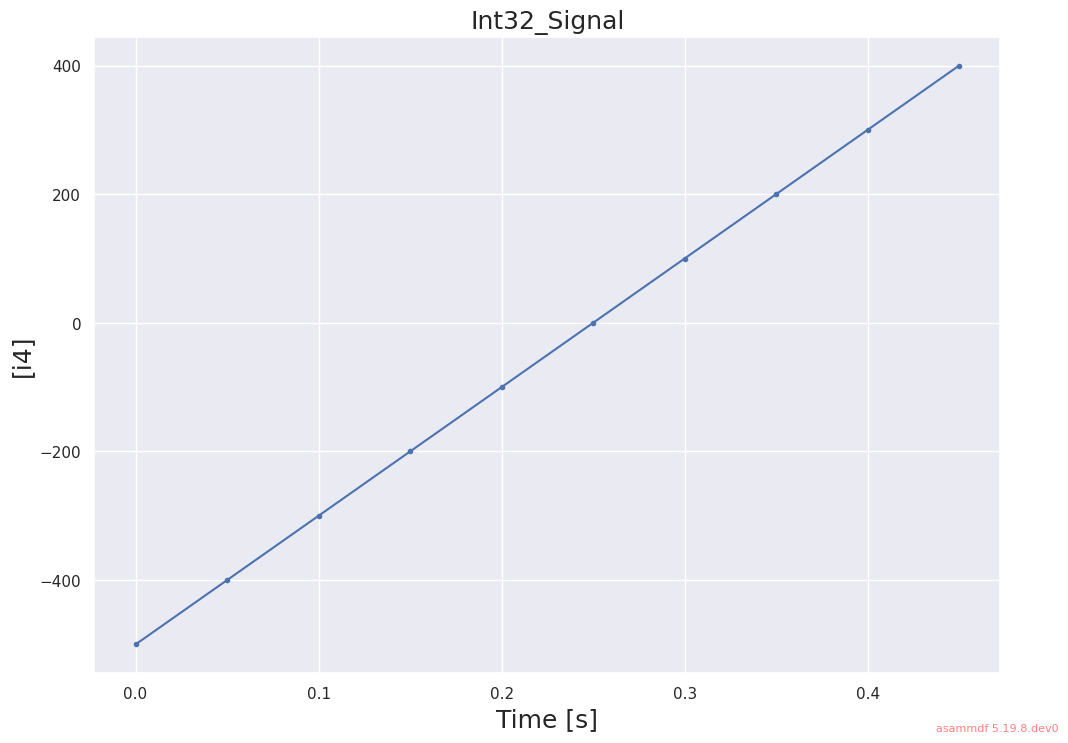

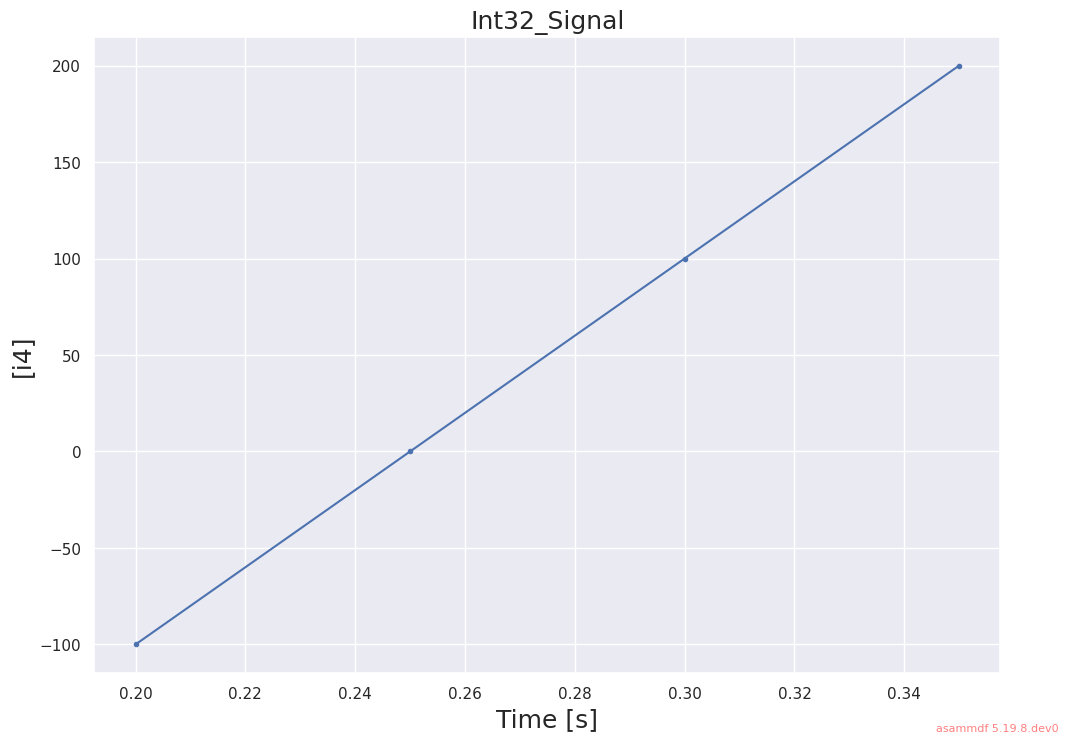

In [20]:
prod = s_float64 * s_uint8
prod.name = "Uint8_Signal * Float64_Signal"
prod.unit = "*"
prod.plot()

pow2 = s_uint8 ** 2
pow2.name = "Uint8_Signal ^ 2"
pow2.unit = "u1^2"
pow2.plot()

allsum = s_uint8 + s_int32 + s_float64
allsum.name = "Uint8_Signal + Int32_Signal + Float64_Signal"
allsum.unit = "+"
allsum.plot()

# inplace operations
pow2 *= -1
pow2.name = "- Uint8_Signal ^ 2"
pow2.plot()

# cut signal
s_int32.plot()
cut_signal = s_int32.cut(start=0.2, stop=0.35)
cut_signal.plot()


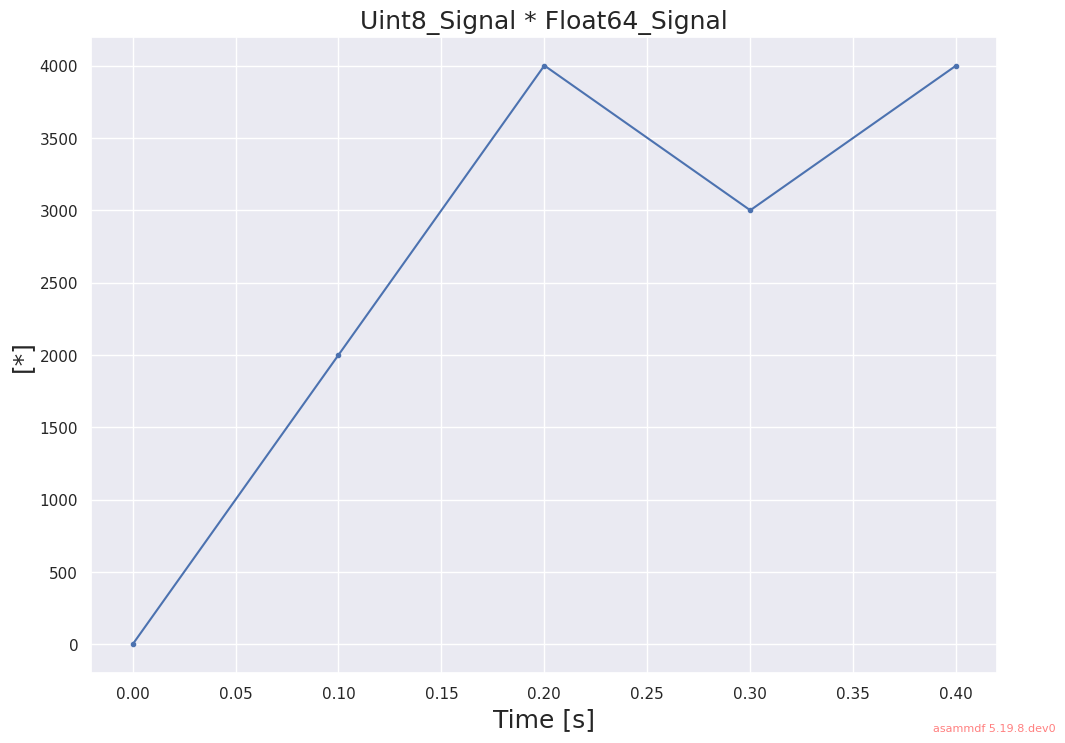

In [21]:
prod = s_float64 * s_uint8
prod.name = "Uint8_Signal * Float64_Signal"
prod.unit = "*"
prod.plot()

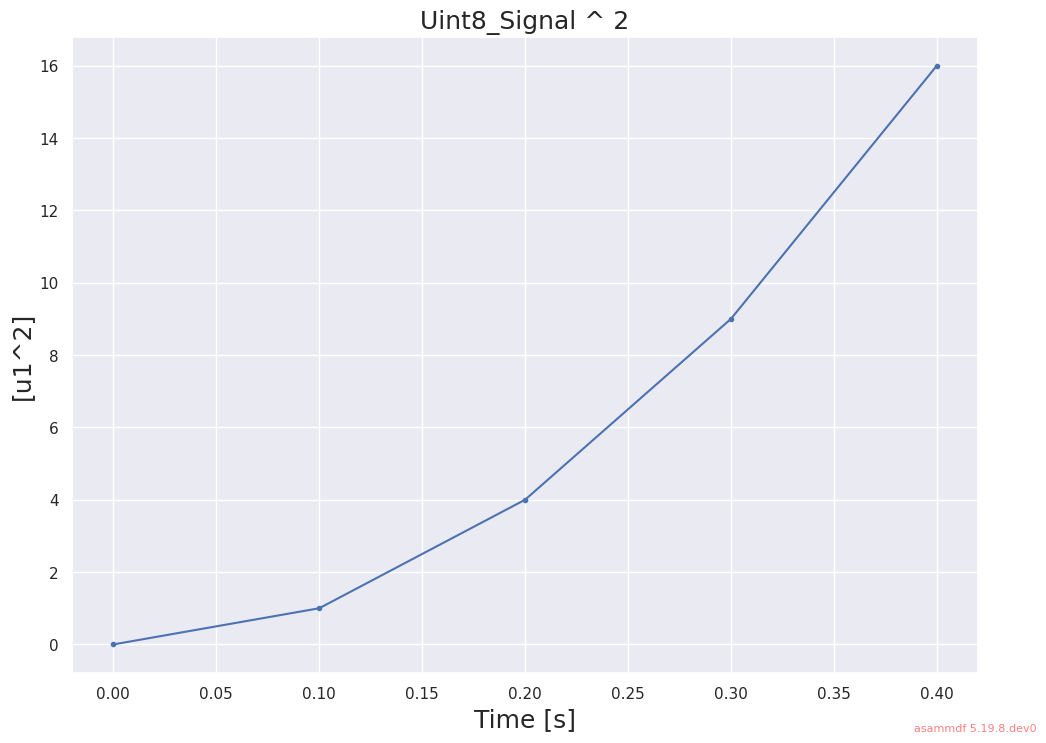

In [22]:
pow2 = s_uint8 ** 2
pow2.name = "Uint8_Signal ^ 2"
pow2.unit = "u1^2"
pow2.plot()

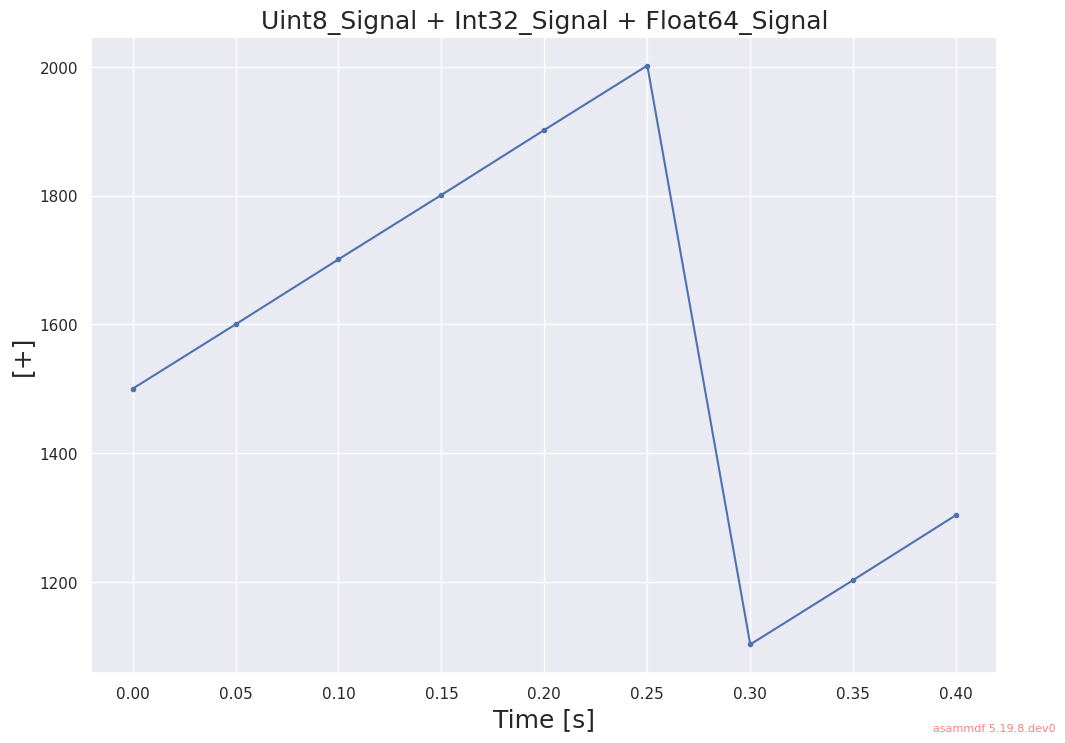

In [23]:
allsum = s_uint8 + s_int32 + s_float64
allsum.name = "Uint8_Signal + Int32_Signal + Float64_Signal"
allsum.unit = "+"
allsum.plot()

# Inplace operations

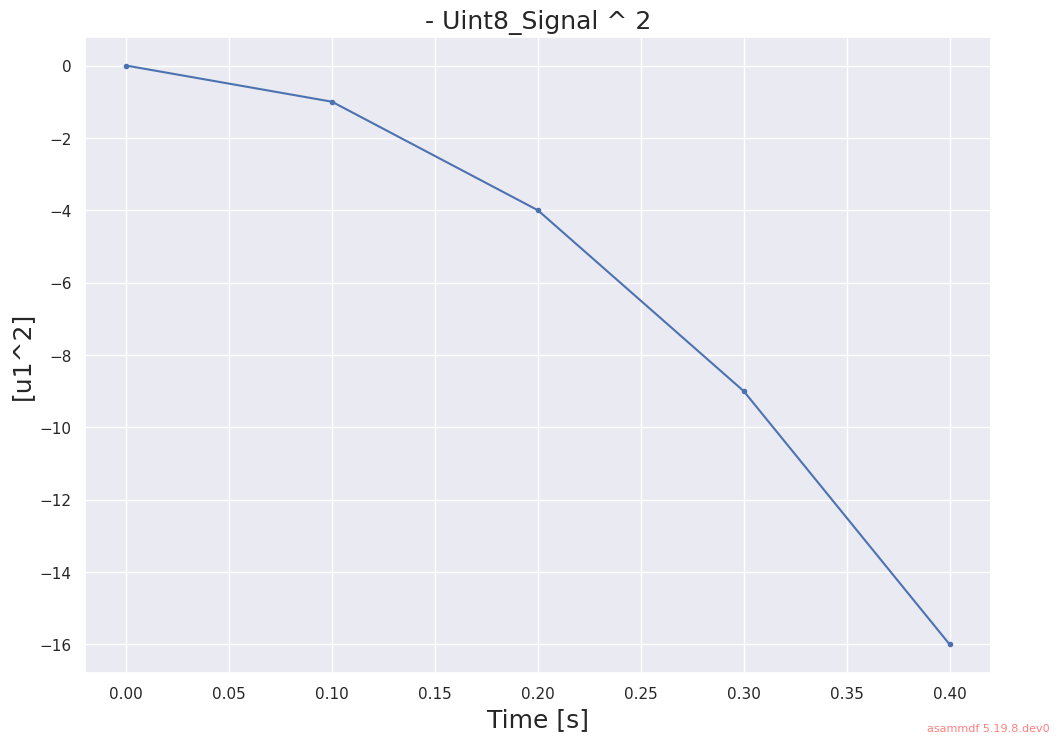

In [24]:
pow2 *= -1
pow2.name = "- Uint8_Signal ^ 2"
pow2.plot()

# Cut Signal

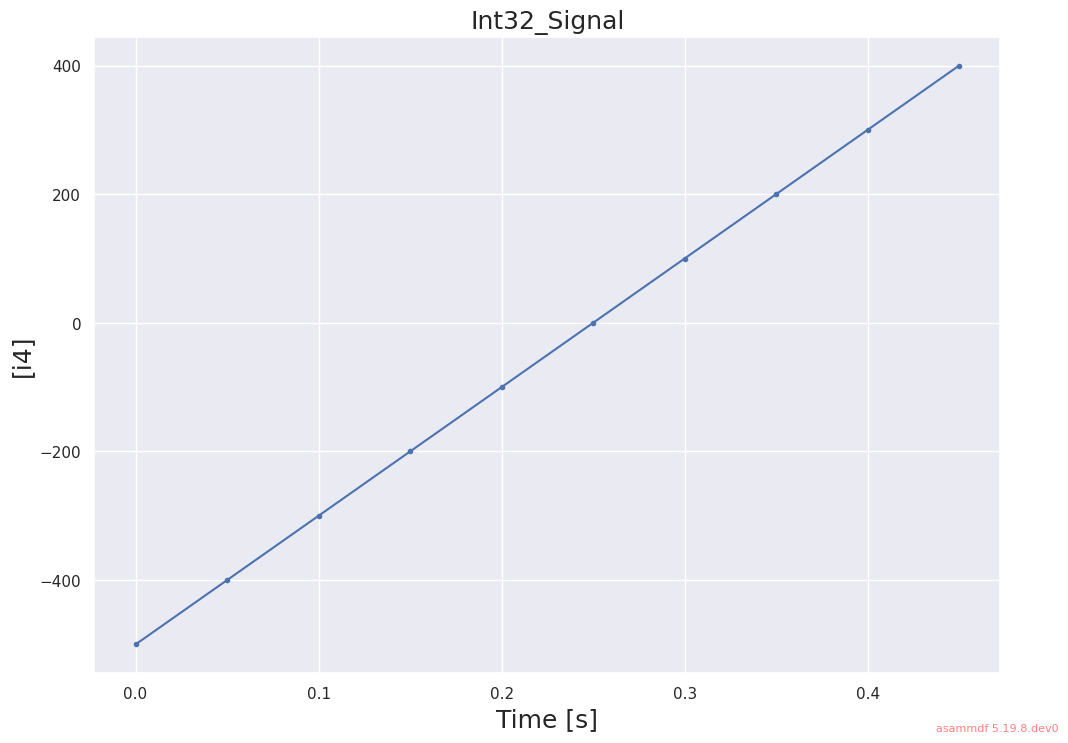

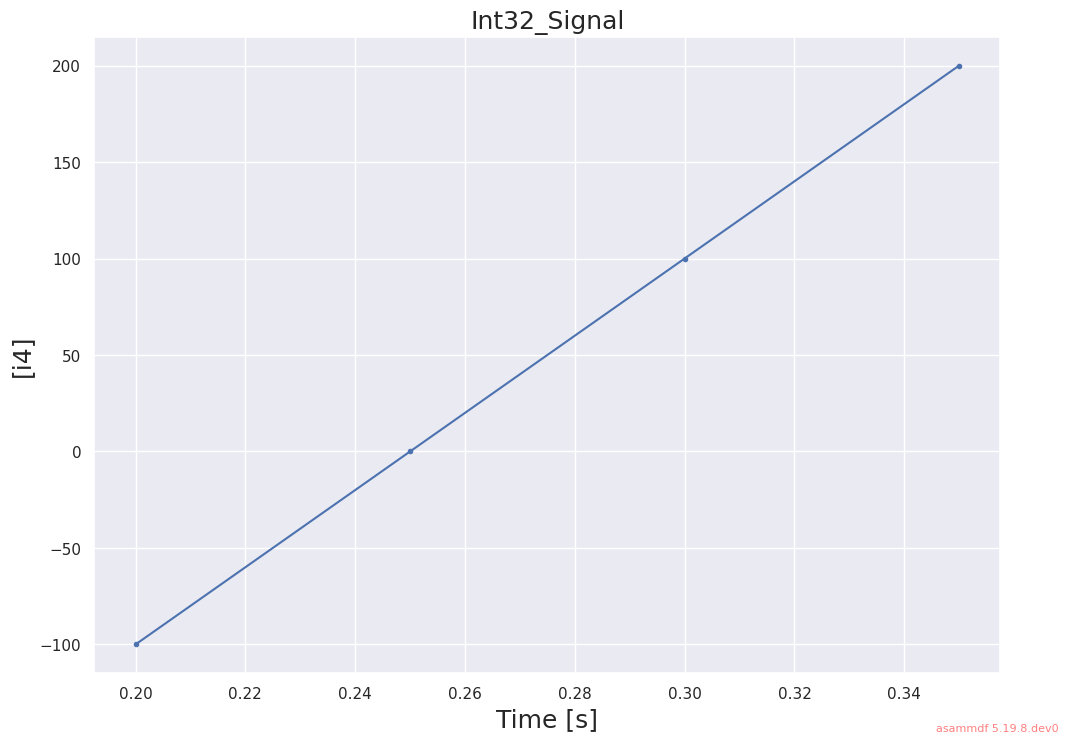

In [25]:
s_int32.plot()
cut_signal = s_int32.cut(start=0.2, stop=0.35)
cut_signal.plot()